In [17]:
import numpy as np
import statistics


In [18]:
## define node strucutre
class Node:
    def __init__(self,parent,position):
        self.parent = parent
        self.position = position
        self.f = 0
        self.g = 0
        self.h = 0
        
    def __lt__(self,other):
        return self.f <= other.f

In [19]:
## create a blank grid
## use a* path to walk the walk --> get path
## check the path, if path is unwalkable, start from the 
## first un-walkable spot, and use a* to find the walk 
def blank_space_a_star(grid,start,end,cost):
    ## turn Nodify start,end point
    start_node = Node(None,start)
    end_node = Node(None,end)
    
    ## create two list --> open_lst, and close_lst 
    ## open_lst: store children nodes 
    ## close_lst: store path node --> path_finder
    open_lst = []
    close_lst = []
    
    open_lst.append(start_node)
    current_node = open_lst[0]
    
    n_row,n_col = np.shape(grid)
    n_row = n_row -1
    n_col = n_col -1
    
    ## put start node into open_lst
    ## loop control, if open lst is not empty
    while len(open_lst)>0:
        
        ## sort open_lst to get the min f val node 
        ## pop that node and set it to current_node
        ## if current_node == end goal, return
            ## else get current_node children
            ## check its children 1. valid? 2. walkable
                ## if yes, append to open_lst 
                ## else, continue
        
        
        open_lst.sort()
#         print("open_lst after sort",[x.position for x in open_lst])
#         print("f value",[x.f for x in open_lst])
        current_node = open_lst.pop(0)
        close_lst.append(current_node)
        if current_node.position == end_node.position:
            return path_finder(current_node,grid,start_node,end_node)
        ## get current_node children
        child_loc = [
            [0,-1], ## moving left
            [0,1],  ## moving right
            [1,0],  ## moving down
            [-1,0] ## moving up
        ]
        
        for child in child_loc:
            ## check if child in open or close lst 
            ## check if child is valid 
            ## check if child is walkale
            ## add node to the open_lst
            mving_child = [current_node.position[0]+child[0],current_node.position[1]+child[1]]
            if mving_child not in [x.position for x in open_lst]:
                if mving_child not in [y.position for y in close_lst]:
                    if 0<=mving_child[0] <= n_row and 0<=mving_child[1] <=n_col:
                        if grid[mving_child[0]][mving_child[1]] != 1:
                            ## create new node
                            mving_node = Node(current_node,mving_child)
                            open_lst.append(mving_node)
        
        
        ## caluclate f,g,h
        ## heuristic: manhattan 
        for children in open_lst:
            children.g = children.g + cost 
            children.h = abs(children.position[0]-end_node.position[0])+ abs(children.position[1]-end_node.position[1])
            children.f = children.g + children.h
            
#         print("close_lst",[x.position for x in close_lst])
#         print("open_lst",[x.position for x in open_lst])
#         print("f value",[x.f for x in open_lst])
#         print("current_node",current_node.position)
#         print("---------------------")
    
    return path_finder(current_node,grid,start_node,end_node)

In [27]:

# blank_route = [[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4]]
def repeated_a_star(grid,start,end,cost,blank_route):
    restart_block = []
    for step in blank_route:
        if grid[step[0]][step[1]] == 0:
            restart_block.append(step) 
        else:
            break
    start_node = restart_block.pop(-1)
    repeated_a_result = search(grid,start_node,end,cost)
    return [restart_block] + [repeated_a_result]
            
    

In [28]:
    
    
## define search function 
def search(grid,start,end,cost):
    ## turn Nodify start,end point
    start_node = Node(None,start)
    end_node = Node(None,end)
    
    ## create two list --> open_lst, and close_lst 
    ## open_lst: store children nodes 
    ## close_lst: store path node --> path_finder
    open_lst = []
    close_lst = []
    
    open_lst.append(start_node)
    current_node = open_lst[0]
    
    n_row,n_col = np.shape(grid)
    n_row = n_row -1
    n_col = n_col -1
    
    ## put start node into open_lst
    ## loop control, if open lst is not empty
    while len(open_lst)>0:
        
        ## sort open_lst to get the min f val node 
        ## pop that node and set it to current_node
        ## if current_node == end goal, return
            ## else get current_node children
            ## check its children 1. valid? 2. walkable
                ## if yes, append to open_lst 
                ## else, continue
        
        
        open_lst.sort()
#         print("open_lst after sort",[x.position for x in open_lst])
#         print("f value",[x.f for x in open_lst])
        current_node = open_lst.pop(0)
        close_lst.append(current_node)
        if current_node.position == end_node.position:
            return path_finder(current_node,grid,start_node,end_node)
        ## get current_node children
        child_loc = [
            [0,-1], ## moving left
            [0,1],  ## moving right
            [1,0],  ## moving down
            [-1,0] ## moving up
        ]
        
        for child in child_loc:
            ## check if child in open or close lst 
            ## check if child is valid 
            ## check if child is walkale
            ## add node to the open_lst
            mving_child = [current_node.position[0]+child[0],current_node.position[1]+child[1]]
            if mving_child not in [x.position for x in open_lst]:
                if mving_child not in [y.position for y in close_lst]:
                    if 0<=mving_child[0] <= n_row and 0<=mving_child[1] <=n_col:
                        if grid[mving_child[0]][mving_child[1]] != 1:
                            ## create new node
                            mving_node = Node(current_node,mving_child)
                            open_lst.append(mving_node)
        
        
        ## caluclate f,g,h
        ## heuristic: manhattan 
        for children in open_lst:
            children.g = children.g + cost 
            children.h = abs(children.position[0]-end_node.position[0])+ abs(children.position[1]-end_node.position[1])
            children.f = children.g + children.h
            
#         print("close_lst",[x.position for x in close_lst])
#         print("open_lst",[x.position for x in open_lst])
#         print("f value",[x.f for x in open_lst])
#         print("current_node",current_node.position)
#         print("---------------------")
    
    return path_finder(current_node,grid,start_node,end_node)
        

In [29]:
def path_finder(current_node,grid,start_node,end_node):
    path = []
    
    current = current_node
    
    while current:
        
        path.append(current.position)
        
        current = current.parent
        
    path = path[::-1]
    
    if path[0] == start_node.position and path[-1] == end_node.position:
        return path
    else:
        return "Path is not found"

In [30]:
import random 
random.uniform(0, 1)

0.9924819984178715

In [31]:
import random

## maze function --> 101 x 101 
## '0' walkable
## '1' block
def create_maze(nx,ny,p_val):
    ##empty maze, all values are 0
    maze = [[0 for j in range(nx)]for i in range(ny)]
    
    ## loop each cell, calculate p value, resign val
    for i in range(nx):
        for j in range(ny):
            prob_test_for_each_blck = random.uniform(0, 1)
            if prob_test_for_each_blck <= p_val:
                maze[i][j] = 1 
    maze[0][0] = 0
    maze[100][100] = 0
    return maze


In [32]:
def q4(nx,ny,p_val):
    return_result = []
    pass_lst = []
    avg_solv = []
    for x in range(50):
        start = [0,0]
        end = [100,100]
        maze = [[0 for j in range(nx)]for i in range(ny)]
        blank_route = blank_space_a_star(maze,start,end,cost)
        grid = create_maze(nx,ny,p_val)
        repeated_result = repeated_a_star(grid,start,end,cost,blank_route)
        if repeated_result[-1] != 'Path is not found':
            pass_lst.append('Yes Path')
        else:
            pass_lst.append('No Path')
        
        solv = pass_lst.count('Yes Path')/len(pass_lst)
        avg_solv.append(solv)
    solv_result = statistics.mean(avg_solv)
    return [p_val,solv_result]


In [33]:
if __name__ == "__main__":
    cost = 1
    result_lst = []
    nx,ny = 101,101
    for x in np.arange(0,1,0.05):
        p_val = float("{0:.2f}".format(x))
        result_lst.append(q4(nx,ny,p_val))
    print(result_lst)

[[0.0, 1.0], [0.05, 1.0], [0.1, 0.995086754012139], [0.15, 0.9246839476896671], [0.2, 0.9225921188526702], [0.25, 0.642158866137292], [0.3, 0.6042534461070763], [0.35, 0.2994243605209899], [0.4, 0.0], [0.45, 0.0], [0.5, 0.0], [0.55, 0.0], [0.6, 0.0], [0.65, 0.0], [0.7, 0.0], [0.75, 0.0], [0.8, 0.0], [0.85, 0.0], [0.9, 0.0], [0.95, 0.0]]


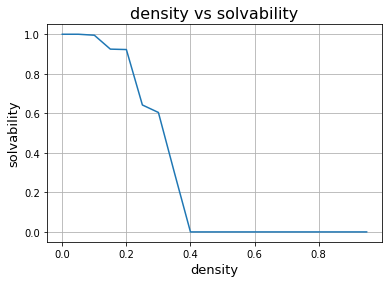

In [34]:
import matplotlib.pyplot as plt

x = [x[0] for x in result_lst]
y = [y[1] for y in result_lst]


fig = plt.figure(1)
plt.title("density vs solvability", fontsize='16')
plt.plot(x, y)
plt.xlabel("density",fontsize='13')
plt.ylabel("solvability",fontsize='13')
plt.grid()
plt.show()